In [2]:
#import functions from module
import sys
sys.path.append('/Users/fardila/Documents/GitHub/HSC_vs_hydro/')
from functions import *

NOPE


      +------------------------------------------------------------+
      |       Space Telescope Science Data Analysis System         |
      |                   STSDAS Version 3.18.3                    |
      |                                                            |
      |   Space Telescope Science Institute, Baltimore, Maryland   |
      |   Copyright (C) 2014 Association of Universities for       |
      |            Research in Astronomy, Inc.(AURA)               |
      |       See stsdas$copyright.stsdas for terms of use.        |
      |         For help, send e-mail to help@stsci.edu            |
      |                                                            |
      +------------------------------------------------------------+
stsdas/:
 analysis/      examples        hst_calib/      sobsolete/
 contrib/       fitsio/         playpen/        toolbox/
 describe       graphics/       problems
isophote/:
 bmodel         geompar@        isomap          magpar@
 

In [33]:
def get_iso_vary_geometry(sim_file, sim_name, resolution, stars= 'all', intMode='mean', components='cen', gal_n=0):

    '''
    get iso using galSBP
    '''
    print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
    print('^^^^^{0} GALAXY {1}^^^^^^'.format(sim_name, gal_n))
    print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')

    # Load maps
    mass_map_cen, mass_map_cen_icl, pixel_scale, m_cat = get_mass_maps(sim_file, stars, gal_n=gal_n)

    #ouput maps
    maps_location='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/{0}/'.format(resolution)

    file_name=sim_name+'_'+str(gal_n)+'_xy'
    fits_prefix = maps_location + file_name

    #components
    if components == 'cen':
        save_to_fits(mass_map_cen, fits_prefix + '_cen.fits')
        data=mass_map_cen
    elif components == 'cen+icl':
        save_to_fits(mass_map_cen_icl, fits_prefix + '_cen+icl.fits')
        data=mass_map_cen_icl
    else:
        raise ValueError('only cen or cen+icl allowed for now')


    suffix='_'+components

    #central pixels
    x0=len(data)/2.
    y0=len(data)/2.


    ###########################################################################
    #1D masses from galSBP
    iso, iso_bin = galSBP.galSBP(maps_location+file_name+suffix+'.fits',
                                     galX=x0,
                                     galY=y0,
                                     maxSma=250,
                                     iniSma=50.0,
                                     stage=2,
                                     intMode=intMode,
                                     ellipStep=0.05,
                                     pix=pixel_scale,
                                     zpPhoto=0.0,
                                     isophote=x_isophote,
                                     xttools=x_ttools,
                                     recenter=True,
                                     savePng=False,
                                     verbose=True,
                                     uppClip=3.0,
                                     lowClip=3.0,
                                     nClip=2)


    ###########################################################################
    try:
        iso['sma_kpc'] = iso['sma'] * pixel_scale
        iso['intens_kpc']=iso['intens'] / (pixel_scale**2)
    except:
        pass

    return iso

In [30]:
iso = get_iso_vary_geometry(TNG_file_highres,'TNG', 'highres', intMode='mean', components='cen', gal_n=0) 

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^TNG GALAXY 0^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
----------------------------------------------------------------------------------------------------
###      galX, galY :  150.0 150.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 250
###      Stage :  2
###      Step :  0.05
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/highres/TNG_0_xy_cen.fits
###      Input Image   : temp_UIU6P.fits
###      Output Binary : /Users/

In [15]:
iso2 = get_iso_vary_geometry(TNG_file_quick,'TNG', 'quick', intMode='mean', components='cen', gal_n=0) 

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^TNG GALAXY 0^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
----------------------------------------------------------------------------------------------------
###      galX, galY :  150.0 150.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 250
###      Stage :  2
###      Step :  0.05
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/quick/TNG_0_xy_cen.fits
###      Input Image   : temp_0US15.fits
###      Output Binary : /Users/fa

## plot profile to check


In [17]:
# fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=False, figsize=(10*3, 10))
# fig.subplots_adjust(left=0.22, right=0.995, bottom=0.14, top=0.94, wspace=0.00, hspace=0.00)
def plot_check(iso):
    fig = plt.figure(figsize=(8, 7))
    fig.subplots_adjust(hspace=0.0, wspace=0.0, 
                        left=0.13, bottom=0.10,
                        top=0.97, right=0.97)

    ax1 = plt.subplot(3, 1, 1)
    ax1.grid(linewidth=2.0, linestyle='--', alpha=0.5)
    ax1.plot((iso['sma_kpc'] ) ** 0.25,
                 np.log10(iso['intens_kpc'])+ np.log10(0.7 ** 2.0) , linewidth=3)
    ax1.set_ylabel(r'$\mathrm{\mu}$', fontsize=20)


    ax3 = plt.subplot(3, 1, 2)
    ax3.grid(linewidth=2.0, linestyle='--', alpha=0.5)
    ax3.plot(iso['sma']** 0.25, iso['ell'], linewidth=3.0)
    ax3.set_ylabel(r'$e$', fontsize=20)

    ax4 = plt.subplot(3, 1, 3)
    ax4.grid(linewidth=2.0, linestyle='--', alpha=0.5)
    ax4.plot(iso['sma']** 0.25, iso['pa'], linewidth=3.0)
    ax4.set_ylabel(r'$\mathrm{PA}$', fontsize=20)

    ax4.set_xlabel(r'$\mathrm{SMA}$', fontsize=25)

    plt.show()

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^TNG GALAXY 0^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
----------------------------------------------------------------------------------------------------
###      galX, galY :  150.0 150.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 250
###      Stage :  3
###      Step :  0.05
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/highres/TNG_0_xy_cen.fits
###      Input Image   : temp_IWRI7.fits
###      Output Binary : /Users/

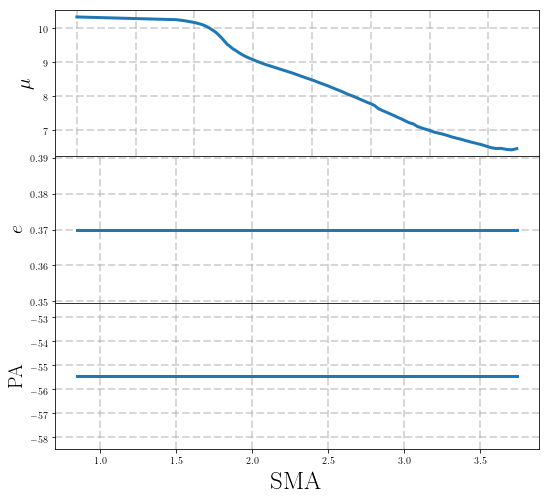

In [18]:
iso = get_iso(TNG_file_highres,'TNG', 'highres', intMode='mean', components='cen', gal_n=0) 
plot_check(iso)

In [22]:
tng_isos_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/tng_isos_highres.pkl'

tng_isos = open_pkl(tng_isos_file)


In [23]:
tng_isos[0]

sma,intens,int_err,pix_var,rms,ell,ell_err,pa,pa_err,x0,x0_err,y0,y0_err,grad,grad_err,grad_r_err,rsma,mag,mag_lerr,mag_uerr,tflux_e,tflux_c,tmag_e,tmag_c,npix_e,npix_c,a3,a3_err,b3,b3_err,a4,a4_err,b4,b4_err,ndata,nflag,niter,stop,a_big,sarea,a1,a1_err,b1,b1_err,a2,a2_err,b2,b2_err,pa_norm,sbp_ori,sbp_sub,sbp,intens_sub,intens_bkg,sbp_err,sbp_low,sbp_upp,sma_asec,rsma_asec,growth_ori,growth_sub,avg_x0,avg_y0,avg_q,avg_pa,avg_bkg,intens_cor,sbp_cor,growth_cor,rad_outer,mag_tot,mag_tot_ori,mag_tot_sub,sma_kpc,intens_kpc
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0,43815710000.0,nan,nan,nan,nan,nan,nan,nan,150.0,nan,150.0,nan,-14131210000.0,nan,nan,0.0,-26.60407,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-26.604074633738712,-26.604074633738712,-26.604074633738712,43815710000.0,0.0,nan,nan,nan,0.0,0.0,0.0,0.0,150.0,150.0,0.61,-56.75,6099073.0,43809610927.0,-26.603923490568853,0.0,66.80550481164319,-30.607601719149322,-30.650375016735065,-30.650375016735065,0.0,43815710000.0
0.5095395,36615310000.0,2143554000.0,10930030000.0,7728695000.0,0.39,0.0839363,-56.75,7.910608,150.0,0.03172612,150.0,0.0266546,-13508520000.0,62087100000.0,4.596145,0.8448789,-26.40916,0.06549842,0.06177077,43815710000.0,43815710000.0,-26.60407,-26.60407,1.0,1.0,-0.01560725,0.09044424,0.09541575,0.4417539,-0.09040454,0.4161734,-0.1291206,0.5938857,13,0,1.0,0.0,nan,2.0,-4302996.0,160750576.0,-7947880.0,155439984.0,-9187525.0,160776480.0,-9182085.0,155352080.0,-56.75,-26.409156788502223,-26.409156788502223,-26.409156788502223,36615310000.0,0.0,0.06177081060756251,-26.470927599109785,-26.34738597789466,0.5095395,0.8448788999328432,0.0,0.0,150.0,150.0,0.61,-56.75,6099073.0,36609210927.0,-26.40897592055518,0.0,66.80550481164319,-30.607601719149322,-30.650375016735065,-30.650375016735065,0.5095395,36615310000.0
0.5350164,36270400000.0,2235806000.0,11400420000.0,8061315000.0,0.39,0.08240105,-56.75,7.765918,150.0,0.03270312,150.0,0.02747543,-13449010000.0,61652030000.0,4.58413,0.8552474,-26.39888,0.06908035,0.064945,43815710000.0,43815710000.0,-26.60407,-26.60407,1.0,1.0,-0.01841575,0.1005075,0.09052122,0.4182851,-0.08964251,0.4115926,-0.1276324,0.5855128,13,0,1.0,0.0,nan,2.0,-4717267.0,166950624.0,-7015465.0,161435200.0,-10032514.0,166981088.0,-8407679.0,161347328.0,-56.75,-26.398880862816185,-26.398880862816185,-26.398880862816185,36270400000.0,0.0,0.06494596188684554,-26.46382682470303,-26.33393490092934,0.5350164,0.8552474218842636,1849738439.3306453,1849738439.3306453,150.0,150.0,0.61,-56.75,6099073.0,36264300927.0,-26.398698274777562,1849427395.345126,66.80550481164319,-30.607601719149322,-30.650375016735065,-30.650375016735065,0.5350164,36270400000.0
0.5617672,35909840000.0,2331205000.0,11886860000.0,8405281000.0,0.39,0.08084491,-56.75,7.619258,150.0,0.0336898,150.0,0.02830438,-13387000000.0,61196230000.0,4.571317,0.8657432,-26.38803,0.07287531,0.06829151,43815710000.0,43815710000.0,-26.60407,-26.60407,1.0,1.0,-0.02141261,0.111784,0.08532086,0.3934917,-0.08886363,0.4068829,-0.1260774,0.5767699,13,0,1.0,0.0,nan,2.0,-5176229.0,173407392.0,-5893629.0,167678672.0,-10965857.0,173441936.0,-7462750.0,167590208.0,-56.75,-26.388033675216192,-26.388033675216192,-26.388033675216192,35909840000.0,0.0,0.06829070374248758,-26.45632437895868,-26.319742971473705,0.5617672,0.8657432110349252,3868806227.1179047,3868806227.1179047,150.0,150.0,0.61,-56.75,6099

In [26]:
iso = get_iso_vary_geometry(TNG_file_highres,'TNG', 'highres', intMode='mean', components='cen', gal_n=0)
iso

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^TNG GALAXY 0^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
----------------------------------------------------------------------------------------------------
###      galX, galY :  150.0 150.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 250
###      Stage :  2
###      Step :  0.05
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/highres/TNG_0_xy_cen.fits
###      Input Image   : temp_F5QDF.fits
###      Output Binary : /Users/

sma,intens,int_err,pix_var,rms,ell,ell_err,pa,pa_err,x0,x0_err,y0,y0_err,grad,grad_err,grad_r_err,rsma,mag,mag_lerr,mag_uerr,tflux_e,tflux_c,tmag_e,tmag_c,npix_e,npix_c,a3,a3_err,b3,b3_err,a4,a4_err,b4,b4_err,ndata,nflag,niter,stop,a_big,sarea,a1,a1_err,b1,b1_err,a2,a2_err,b2,b2_err,pa_norm,sbp_ori,sbp_sub,sbp,intens_sub,intens_bkg,sbp_err,sbp_low,sbp_upp,sma_asec,rsma_asec,growth_ori,growth_sub,avg_x0,avg_y0,avg_q,avg_pa,avg_bkg,intens_cor,sbp_cor,growth_cor,rad_outer,mag_tot,mag_tot_ori,mag_tot_sub,sma_kpc,intens_kpc
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0,43815710000.0,nan,nan,nan,nan,nan,nan,nan,150.0,nan,150.0,nan,-17112760000.0,nan,nan,0.0,-26.60407,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-26.604074633738712,-26.604074633738712,-26.604074633738712,43815710000.0,0.0,nan,nan,nan,0.0,0.0,0.0,0.0,150.0,150.0,0.7293231675077878,3.5103474047454903,5327017.5,43810382982.5,-26.603942624297833,0.0,69.05864888244466,-30.610097511045097,-30.655203559863423,-30.655203559863423,0.0,43815710000.0
0.5095395,35096090000.0,2373822000.0,12104170000.0,8558937000.0,0.137843,0.0979677,-49.7884,22.58565,150.0,0.0276722,150.0,0.02714143,-16476820000.0,68803640000.0,4.175783,0.8448789,-26.36315,0.07603931,0.07105886,43815710000.0,43815710000.0,-26.60407,-26.60407,1.0,1.0,-0.03107662,0.1386764,-0.05121703,0.2190137,-0.04956993,0.2080917,-0.1277868,0.5340056,13,0,200.0,2.0,35597128.0,2.0,-15964146.0,176632672.0,78900624.0,170797408.0,-31764102.0,174811664.0,72402256.0,168913728.0,-49.7884,-26.36314683774493,-26.36314683774493,-26.36314683774493,35096090000.0,0.0,0.07105984508568852,-26.43420668283062,-26.292086992659243,0.5095395,0.8448788999328432,0.0,0.0,150.0,150.0,0.7293231675077878,3.5103474047454903,5327017.5,35090762982.5,-26.362982028082484,0.0,69.05864888244466,-30.610097511045097,-30.655203559863423,-30.655203559863423,0.5095395,35096090000.0
0.5350164,34674620000.0,2478725000.0,12639070000.0,8937169000.0,0.137843,0.09884815,-49.55332,22.78863,150.0,0.02930339,150.0,0.02876844,-16414010000.0,68399790000.0,4.16716,0.8552474,-26.35003,0.0805278,0.07496571,43815710000.0,43815710000.0,-26.60407,-26.60407,1.0,1.0,-0.03229975,0.1431063,-0.05738716,0.2436973,-0.04719459,0.1978582,-0.1269537,0.5294473,13,0,200.0,2.0,45904404.0,2.0,-17095648.0,187432064.0,86050136.0,181240032.0,-33981324.0,185393120.0,79064224.0,179138160.0,-49.55332,-26.350029275819153,-26.350029275819153,-26.350029275819153,34674620000.0,0.0,0.07496552511845422,-26.424994800937608,-26.2750637507007,0.5350164,0.8552474218842636,2499345011.2221174,2499345011.2221174,150.0,150.0,0.7293231675077878,3.5103474047454903,5327017.5,34669292982.5,-26.349862462741385,2498961040.046274,69.05864888244466,-30.610097511045097,-30.655203559863423,-30.655203559863423,0.5350164,34674620000.0
0.5617672,34329360000.0,2571599000.0,13112630000.0,9272031000.0,0.1534082,0.09672168,-49.55332,20.20481,150.0,0.03045922,150.0,0.02981839,-16178680000.0,67555230000.0,4.17557,0.8657432,-26.33916,0.08453999,0.07842938,43815710000.0,43815710000.0,-26.60407,-26.60407,1.0,1.0,-0.0334348,0.1477717,-0.05657425,0.2408078,-0.04659155,0.1957618,-0.1263262,0.5279002,13,0,200.0,2.0,45040740.0,2.0,-17568618.0,195004016.0,88129136.0,188561824.0,-34927160.0,192950272.0,80955272.0,186440352.0,-49.55332,-26.339164267444417,-26.339164267444417,-26.339164267444417,34329360000.0,0.0,0.0784298649583

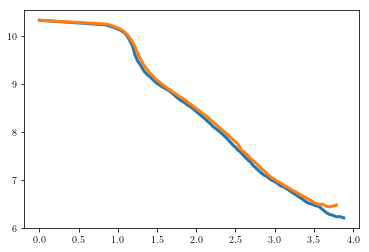

In [27]:
plt.plot((iso['sma_kpc'] ) ** 0.25, np.log10(iso['intens_kpc'])+ np.log10(0.7 ** 2.0) , linewidth=3)
plt.plot((tng_isos[0]['sma_kpc'] ) ** 0.25, np.log10(tng_isos[0]['intens_kpc'])+ np.log10(0.7 ** 2.0) , linewidth=3)

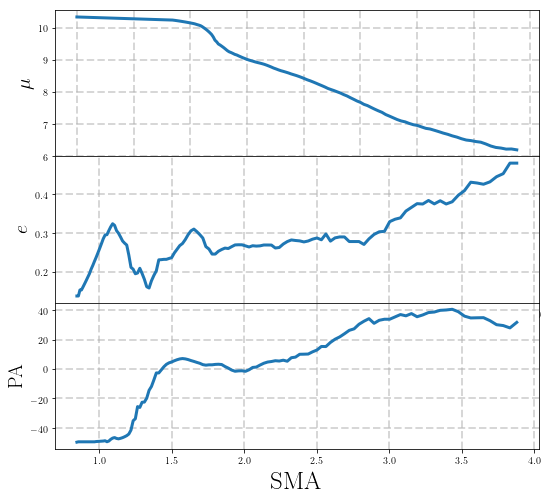

In [28]:
plot_check(iso)

# run on all galaxies!

In [ ]:
resolution = 'highres'
isos_tng = [get_iso_vary_geometry(TNG_file_highres,'TNG', 'highres', intMode='mean', components='cen', gal_n=i) for i in range(235)]

In [40]:
#save as pickles
resolution = 'highres'
outfile_loc = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/'
save_pkl(outfile_loc+'TNG_isos_varying_geometry_{0}.pkl'.format(resolution), isos_tng)

In [39]:
isos_tng[46]

In [34]:
get_iso_vary_geometry(TNG_file_highres,'TNG', 'highres', intMode='mean', components='cen', gal_n=46)

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^TNG GALAXY 46^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
----------------------------------------------------------------------------------------------------
###      galX, galY :  150.0 150.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 250
###      Stage :  2
###      Step :  0.05
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/highres/TNG_46_xy_cen.fits
###      Input Image   : temp_AWNH2.fits
###      Output Binary : /User